In [229]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

from sklearn.preprocessing import StandardScaler

In [230]:
df_train = pd.read_csv("train.csv", sep = ";")
df_test = pd.read_csv("test.csv", sep = ";")

In [231]:
df_legend = pd.concat([df_train, df_test], ignore_index = True)

In [232]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [233]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [234]:
df_train.drop_duplicates(inplace = True)
df_test.drop_duplicates(inplace = True)

In [235]:
for col in df_train.columns:
    if pd.api.types.is_numeric_dtype(df_train[col]):
        df_train[col] = df_train[col].fillna(df_train[col].median())
    else:
        df_train[col] = df_train[col].fillna("unknown")

for col in df_test.columns:
    if pd.api.types.is_numeric_dtype(df_test[col]):
        df_test[col] = df_test[col].fillna(df_test[col].median())
    else:
        df_test[col] = df_test[col].fillna("unknown")

In [236]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z09\s]", "", text)
    return text

In [237]:
df_train_encoded = pd.get_dummies(df_train, drop_first = True)
df_test_encoded = pd.get_dummies(df_test, drop_first = True)

In [238]:
df_train_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [239]:
df_test_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,59,0,5,226,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [240]:
df_train_encoded.isna().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0


In [241]:
df2 = pd.concat([df_train_encoded, df_test_encoded], ignore_index = True)
df2.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [242]:
df2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [243]:
df2.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

In [244]:
df2 = df2.drop(['job_unknown'], axis = 1)
df2 = df2.drop(['education_unknown'], axis = 1)
df2 = df2.drop(['contact_unknown'], axis = 1)
df2 = df2.drop(['poutcome_unknown'], axis = 1)
df2 = df2.drop(['poutcome_other'], axis = 1)

In [245]:
df2.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_success', 'y_yes'],
      dtype='object')

In [246]:
df2.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_success', 'y_yes'],
      dtype='object')

In [247]:
target = "poutcome_success"

x = df2.drop(target, axis = 1)
y = df2[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LogisticRegression(max_iter = 9000, solver = "saga")
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy : {accuracy : .2f}")


Model Accuracy :  0.97


In [248]:
x_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes
49154,45,1757,20,1010,3,326,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48002,32,782,26,116,4,-1,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
30900,32,183,9,17,10,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
44615,34,625,31,34,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5757,32,358,26,396,1,-1,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [249]:
x_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes
40178,39,1241,5,138,2,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
18551,31,1030,31,180,5,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,False,False
12486,41,-147,1,130,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
31102,62,5943,17,196,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
48520,28,618,7,281,1,-1,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [250]:
y_train.head()

49154    False
48002    False
30900    False
44615    False
5757     False
Name: poutcome_success, dtype: bool

In [251]:
y_test.head()

40178    False
18551    False
12486    False
31102    False
48520    False
Name: poutcome_success, dtype: bool

In [252]:
y_pred_prob = model.predict_proba(x_test)[:, 1]
x_test_prob = x_test.copy()
x_test_prob["pred_prob"] = y_pred_prob

In [253]:
x_test_prob.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes,pred_prob
40178,39,1241,5,138,2,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,0.070802
18551,31,1030,31,180,5,-1,0,True,False,False,...,False,True,False,False,False,False,False,False,False,0.052222
12486,41,-147,1,130,1,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,0.073549
31102,62,5943,17,196,4,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,True,0.013153
48520,28,618,7,281,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,0.084296


In [254]:
df2.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_success', 'y_yes'],
      dtype='object')

In [255]:
x_test_prob.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'y_yes', 'pred_prob'],
      dtype='object')

In [256]:
df_legend.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [257]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model_std = LogisticRegression(max_iter = 9000, solver = "saga")
model_std.fit(x_train_scaled, y_train)

coefs = model_std.coef_[0]
feature_names = x_test.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df.sort_values(by='AbsCoefficient', ascending = False, inplace = True)

print("Feature importance based on logistic regression coefficients:")
print(coef_df)

Feature importance based on logistic regression coefficients:
                Feature  Coefficient  AbsCoefficient
36                y_yes     0.788013        0.788013
5                 pdays     0.595841        0.595841
4              campaign    -0.565573        0.565573
22          housing_yes    -0.406938        0.406938
6              previous     0.332442        0.332442
23             loan_yes    -0.262127        0.262127
10       job_management    -0.226594        0.226594
3              duration    -0.205907        0.205907
21          default_yes    -0.202255        0.202255
20   education_tertiary     0.188678        0.188678
7       job_blue-collar    -0.187256        0.187256
8      job_entrepreneur    -0.177167        0.177167
17      marital_married     0.151925        0.151925
18       marital_single     0.142782        0.142782
33            month_nov     0.123335        0.123335
2                   day    -0.118716        0.118716
13         job_services    -0.116216 

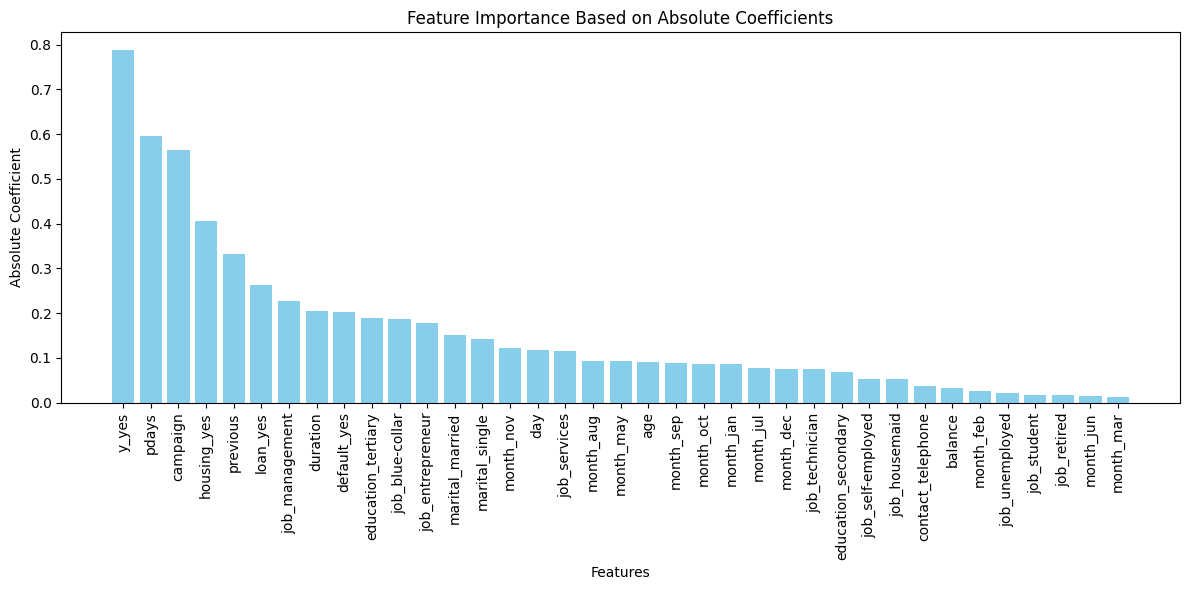

In [258]:
plt.figure(figsize = (12, 6))
plt.bar(coef_df['Feature'], coef_df['AbsCoefficient'], color = 'skyblue')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient')
plt.title('Feature Importance Based on Absolute Coefficients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()